##### 신장 트리
- 그래프에서 모든 노드를 포함하면서 사이클이 존재하지 않는 부분 그래프를 의미한다
- 모든 노드가 포함되어 서로 연결되면서 사이클이 존재하지 않는다는 조건은 트리의 조건이기도 하다

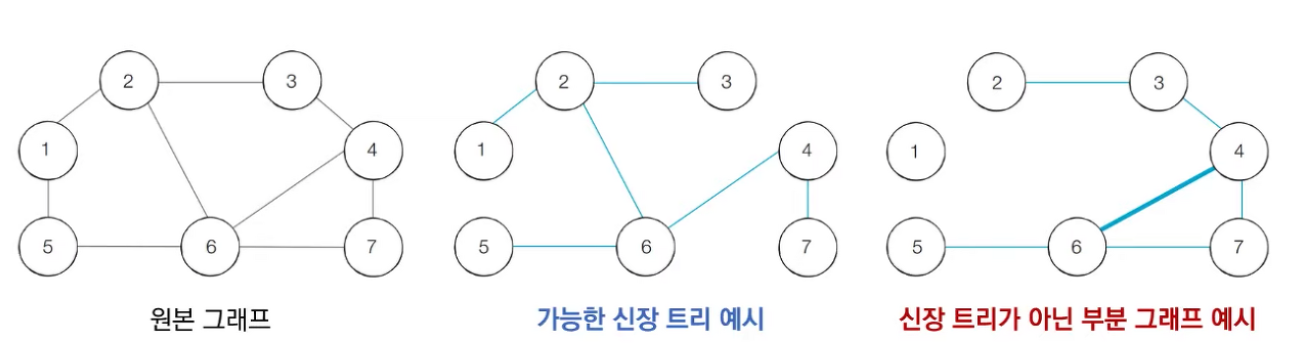

##### 최소 신장 트리

- 그래프에서 모든 노드를 연결할 때 사용된 에지들의 가중치의 합을 최소로 하는 트리
- 최소한의 비용으로 구성되는 신장 트리를 찾아야 할 때 어떻게 해야 할까?
- 예를 들어 N개의 도시가 존재하는 상황에서 두 도시 사이에 도로를 놓아 전체 도시가 서로 연결될 수 있게 도로를 설치하는 경우를 생각해 보자
    - 두 도시 A,B를 선택했을 때 A에서 B로 이동하는 경로가 반드시 존재하도록 도로를 설치한다

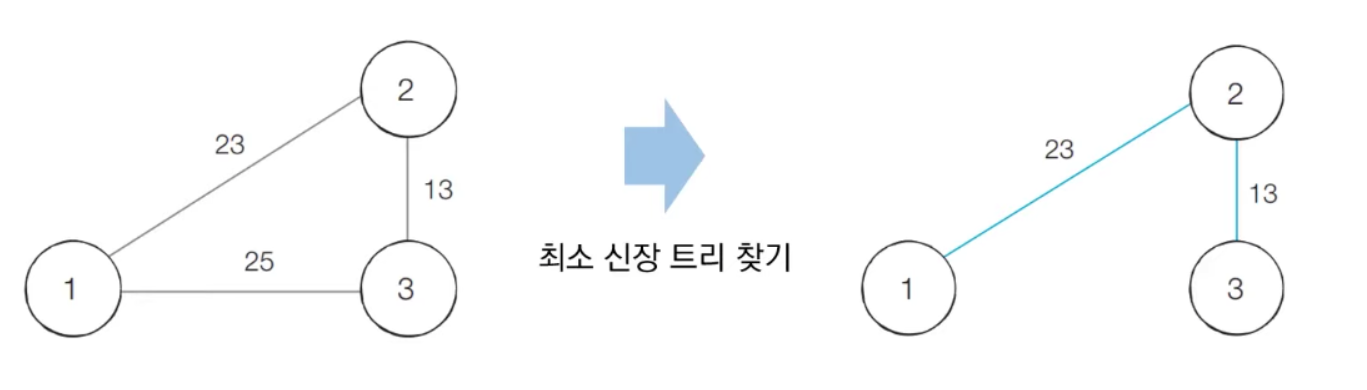

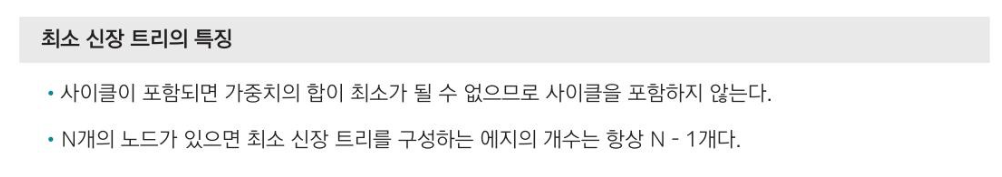

##### 크루스칼 알고리즘
- 대표적인 최소 신장 트리 알고리즘이다
- 그리디 알고리즘으로 분류된다
- 구체적인 동작 과정은 다음과 같다
    1. 간선 데이터를 비용에 따라 오름차순으로 정렬한다
    2. 간선을 하나씩 확인하며 현재의 간선이 사이클을 발생시키는지 확인한다
        - 사이클이 발생하지 않는 경우 최소 신장 트리에 포함시킨다
        - 사이클이 발생하는 경우 최소 신장 트리에 포함시키지 않는다
    3. 모든 간선에 대하여 2번의 과정을 반복한다

##### 크루스칼 알고리즘: 동작 과정 살펴보기

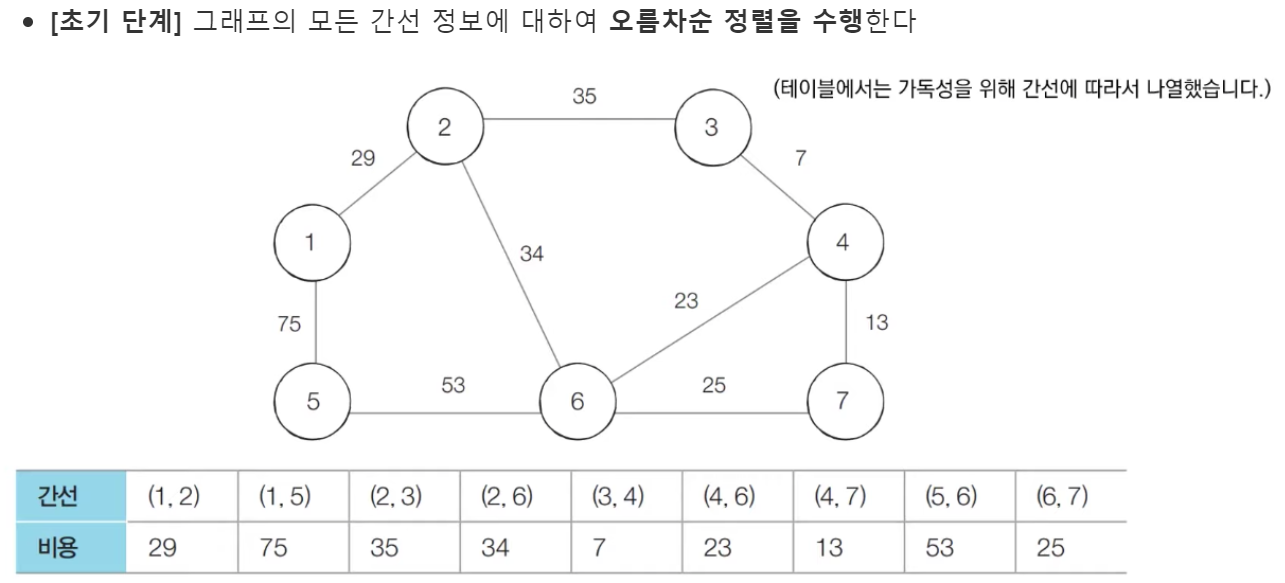

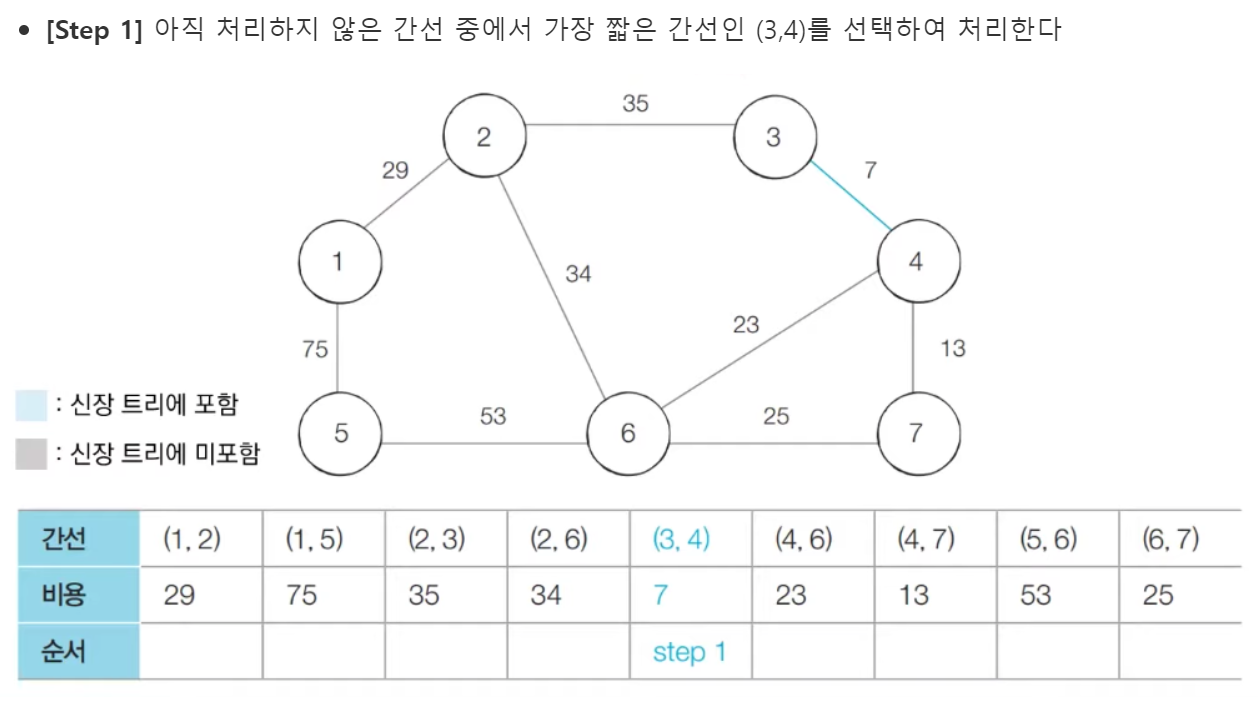

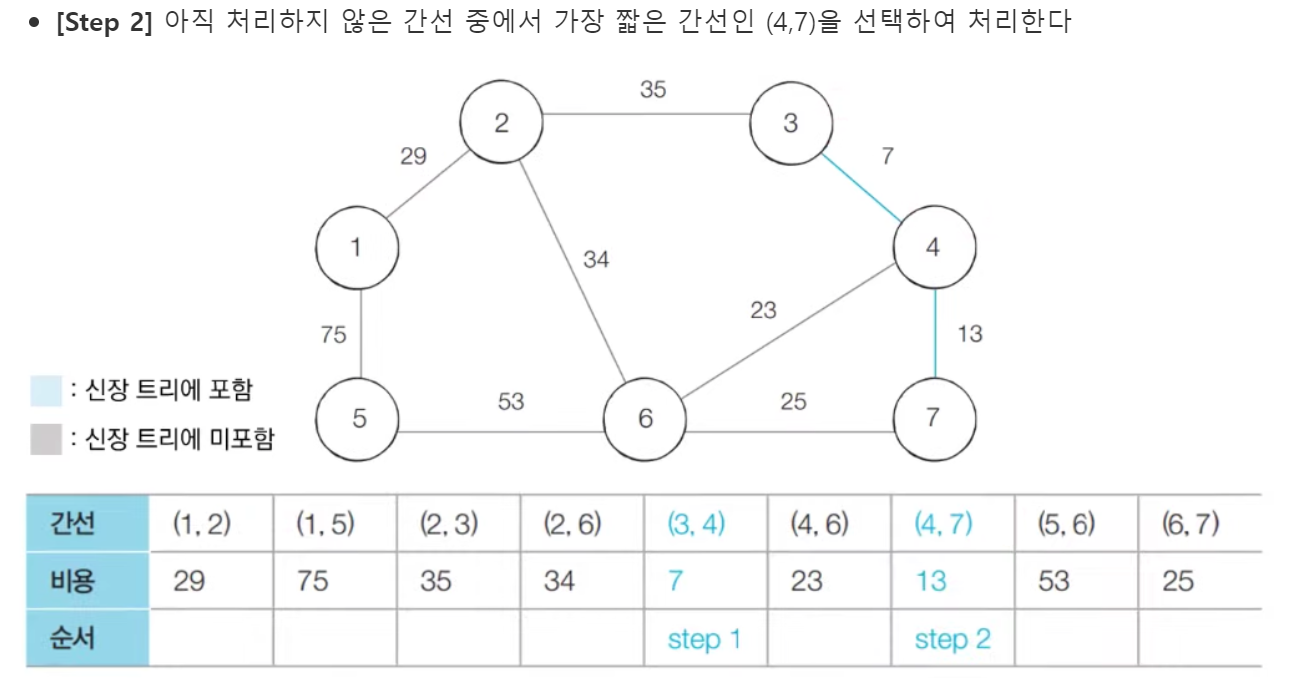

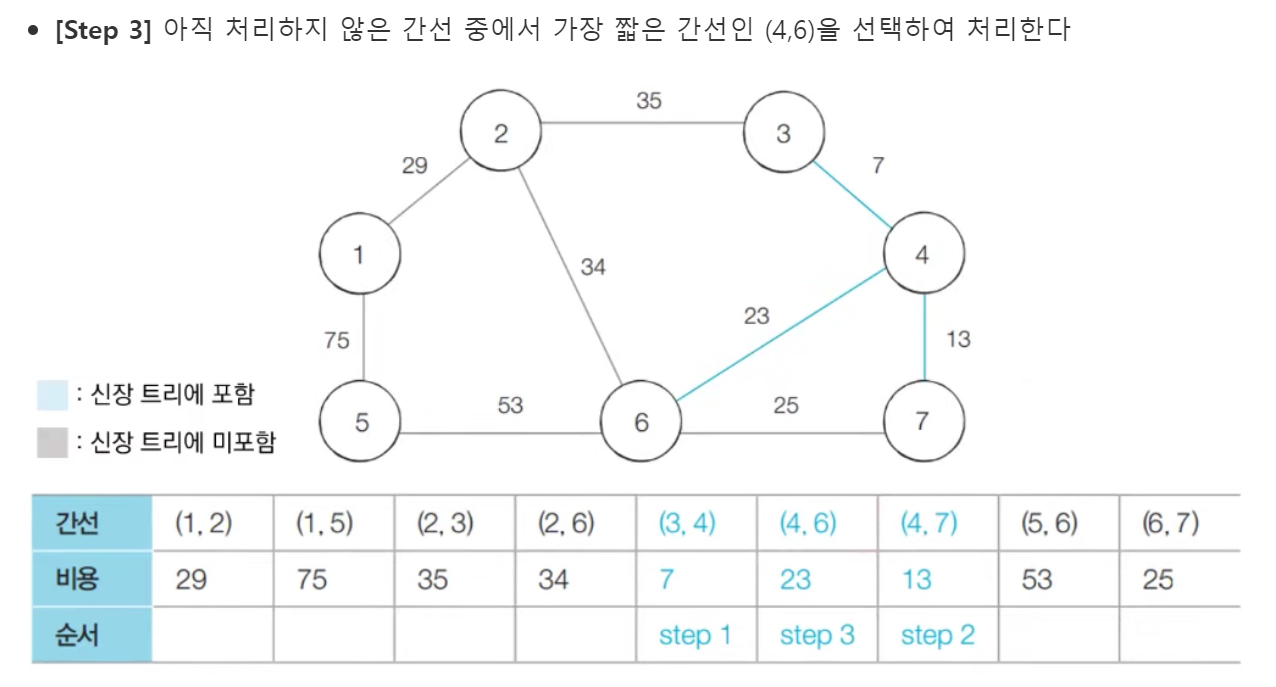

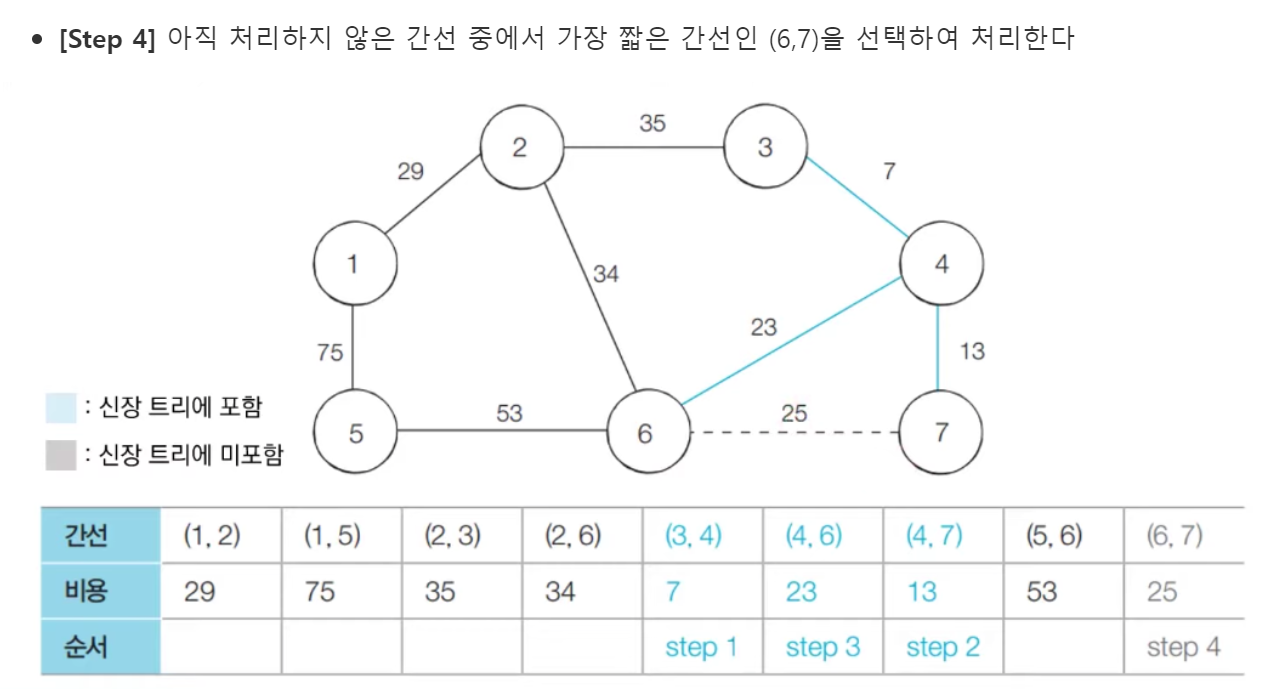

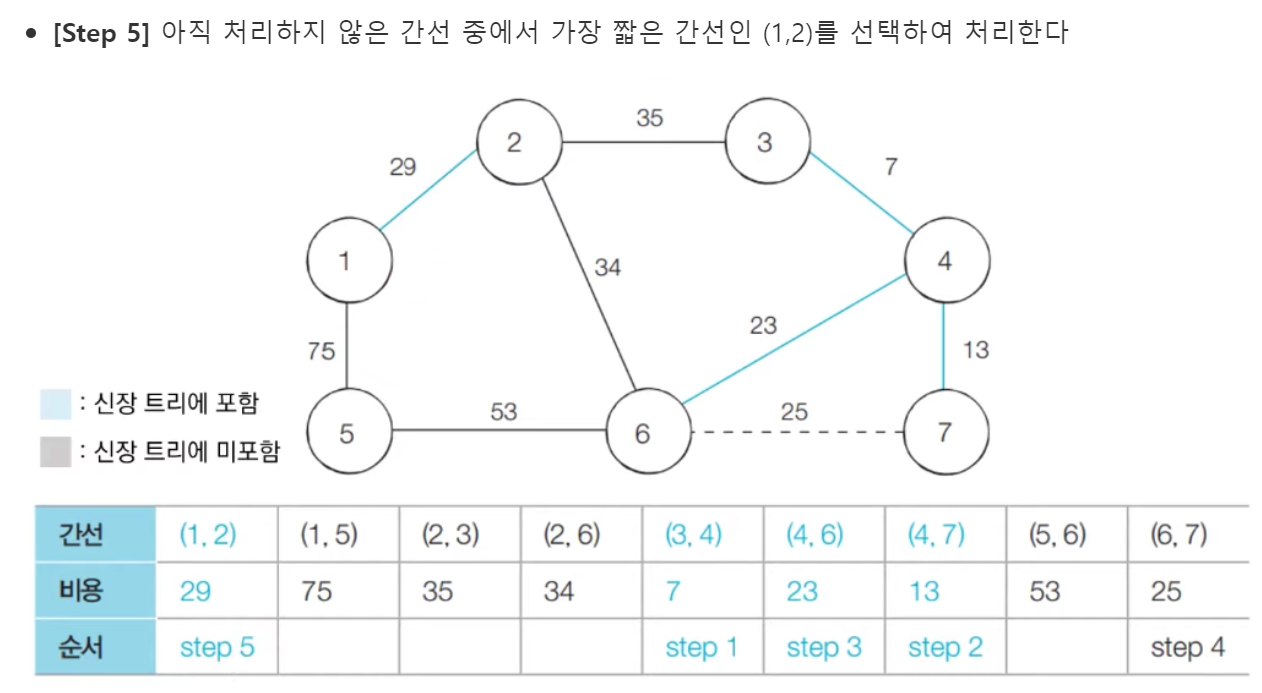

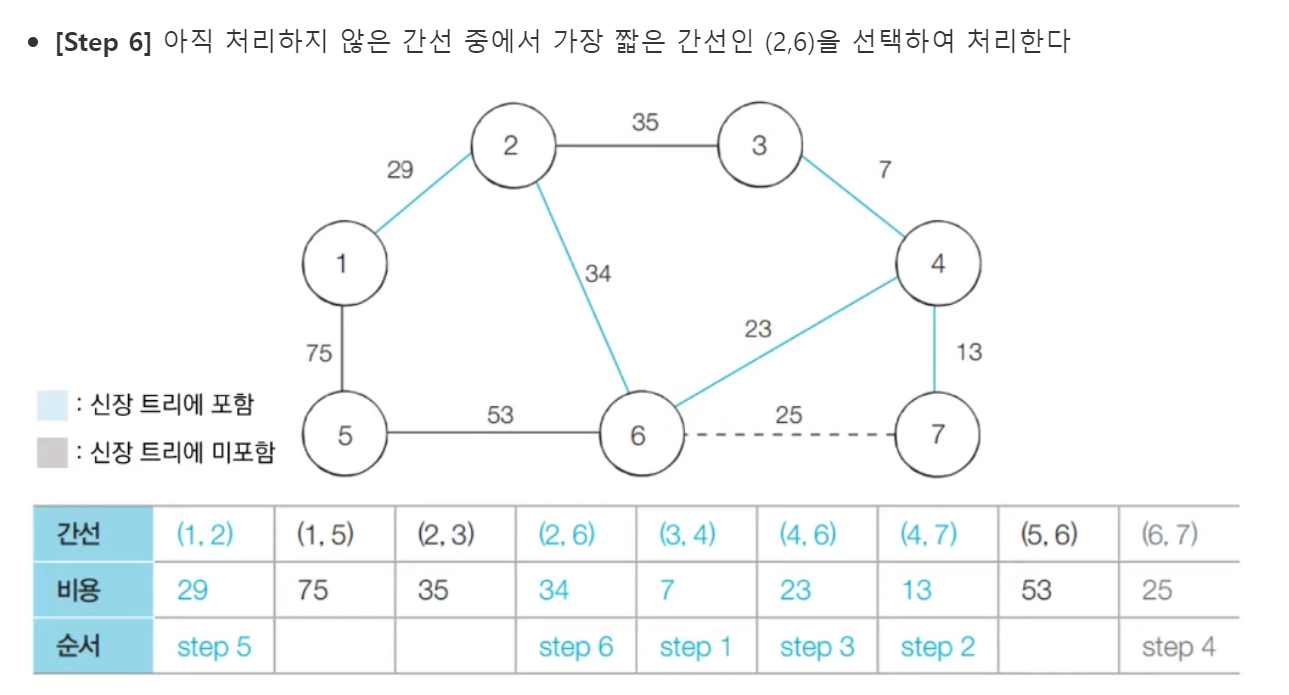

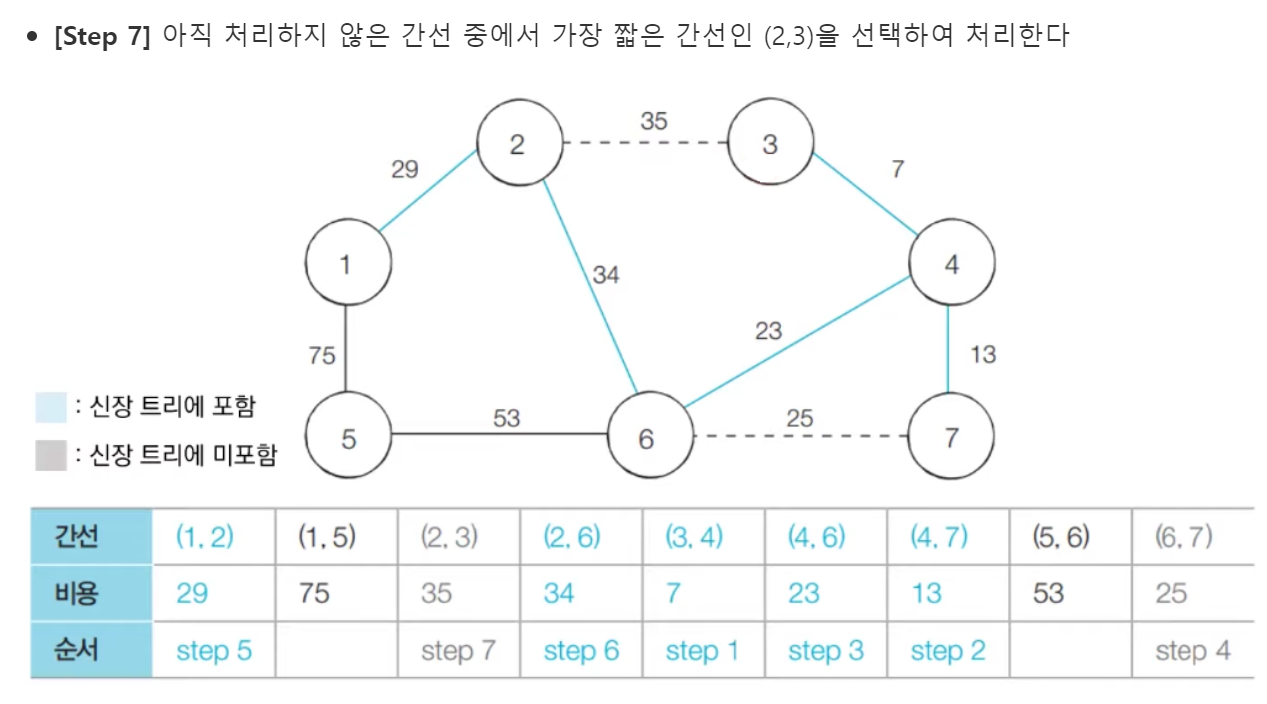

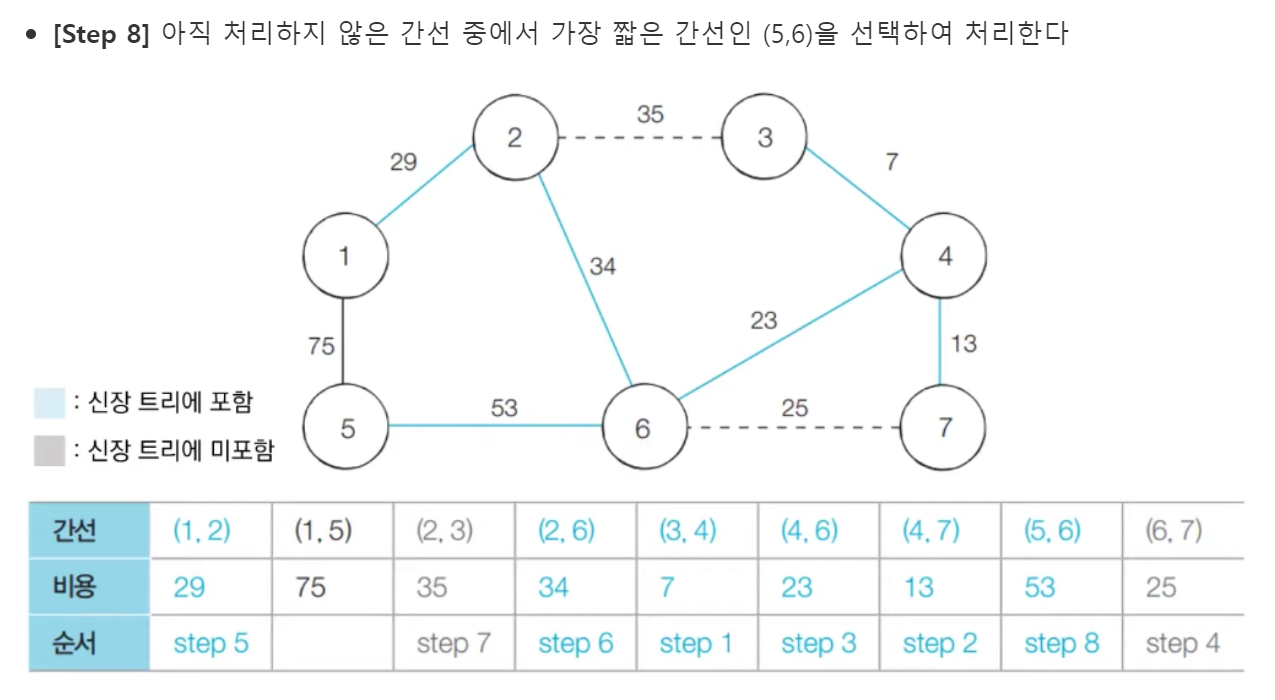

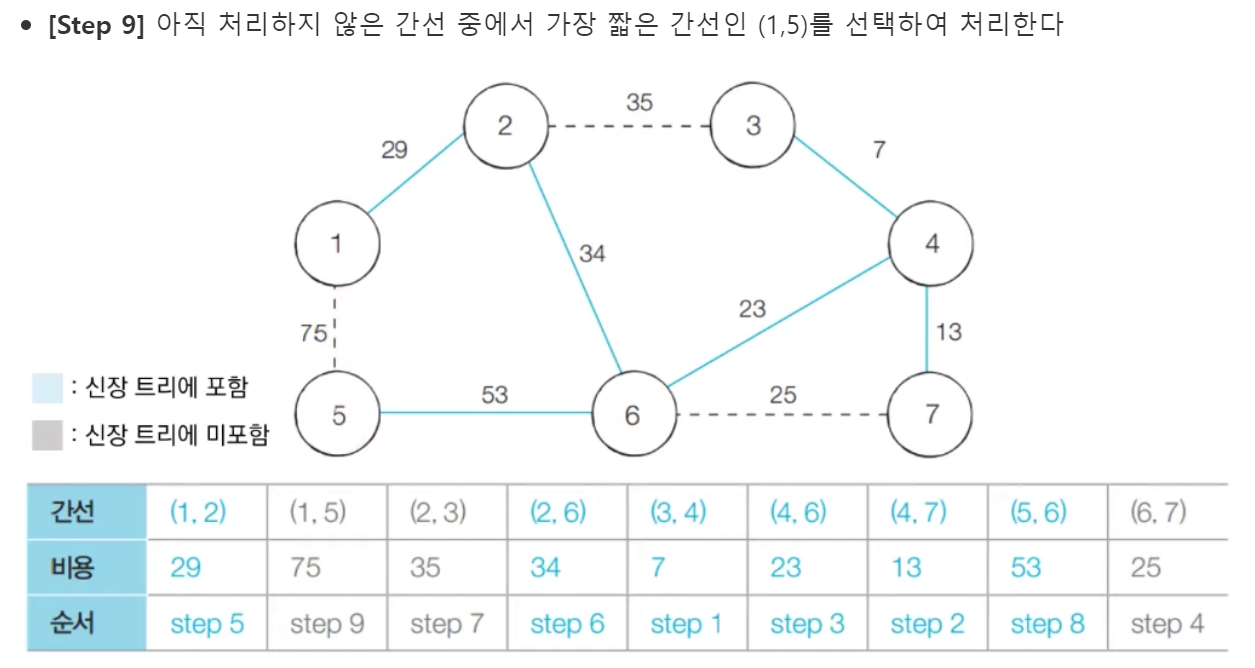

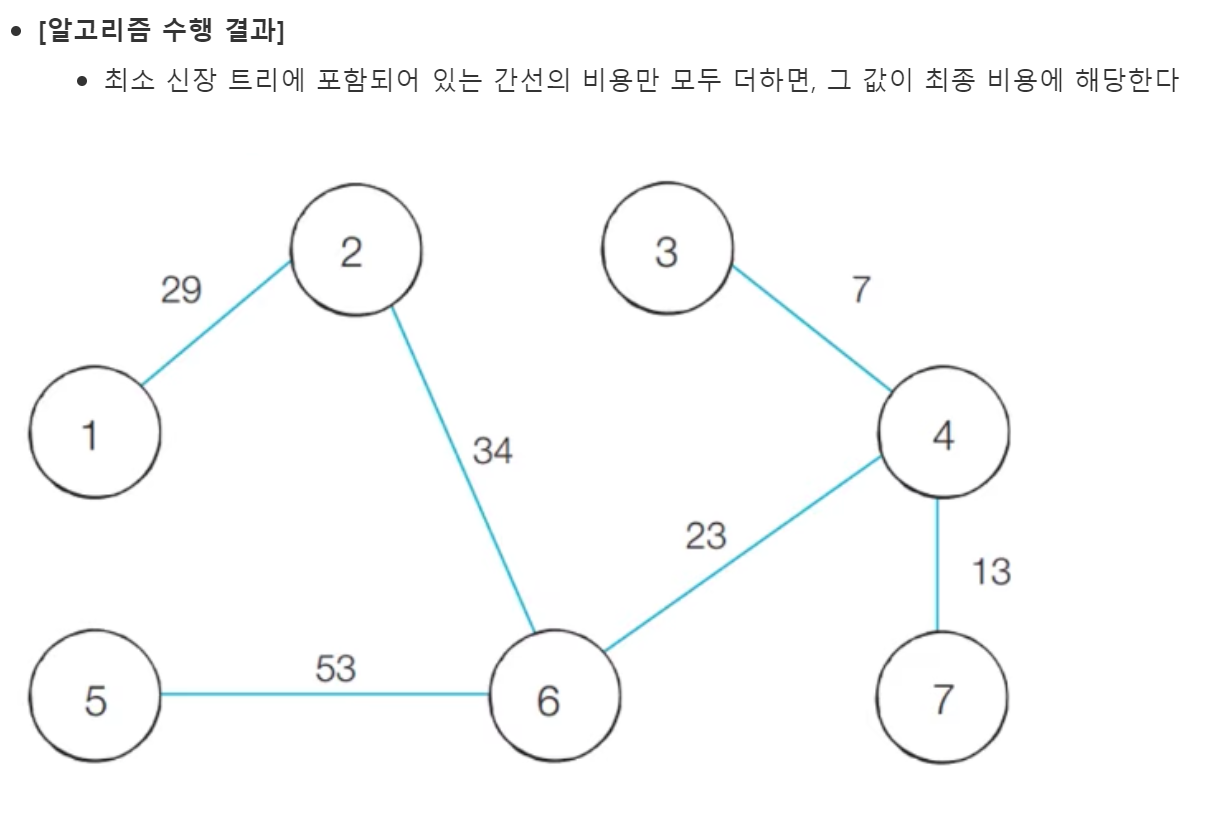

In [3]:
# 코드 적용

# 특정 원소가 속한 집합을 찾기
def find_parent(parent, a):
  # 루트 노드를 찾을 때까지 재귀 호출
  if parent[a] != a:
    return find_parent(parent, parent[a])
  return a

# 두 원소가 속한 집합을 합치기
def union_parent(a, b):
  a = find_parent(parent, a)
  b = find_parent(parent, b)
  if a < b:
    parent[b] = a
  else:
    parent[a] = b
    
# 노드의 개수와 간선(union 연산)의 개수 입력 받기
v, e = map(int, input().split())
parent = [0] * (v + 1)  # 부모테이블 초기화 

# 모든 간선을 담을 리스트와 최종 비용을 담을 변수 선언
edges = []
result = 0

# 부모 테이블상에서, 부모를 자기 자신으로 초기화
for i in range(1, v + 1):
  parent[i] = i
  
# 모든 간선에 대한 정보를 입력 받기
for _ in range(e):
  a, b, c = map(int, input().split())
  # 비용(C)순으로 정렬하기 위해서 튜플의 첫 번째 원소를 비용으로 설정
  edges.append((c, a, b))
  
# 간선을 비용순으로 정렬
edges.sort()

# 간선을 하나씩 확인
for edge in edges:
  c, a, b = edge
  
  # 사이클이 발생하지 않는 경우에만 집합에 포함
  if find_parent(parent, a) != find_parent(parent, b): # 부모가 같지 않다면
    union_parent(a, b)  # 두 원소 합치기
    result += c  # 비용 더하기
    
print(result)

3


##### [문제] 최소 신장 트리 구하기

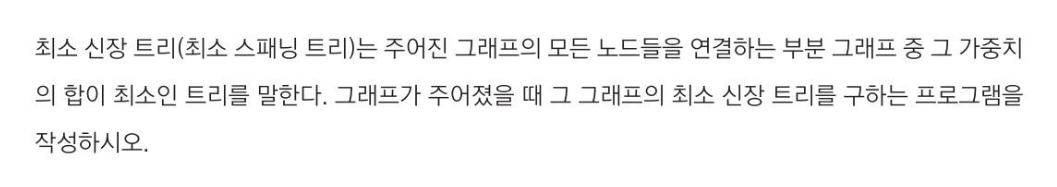

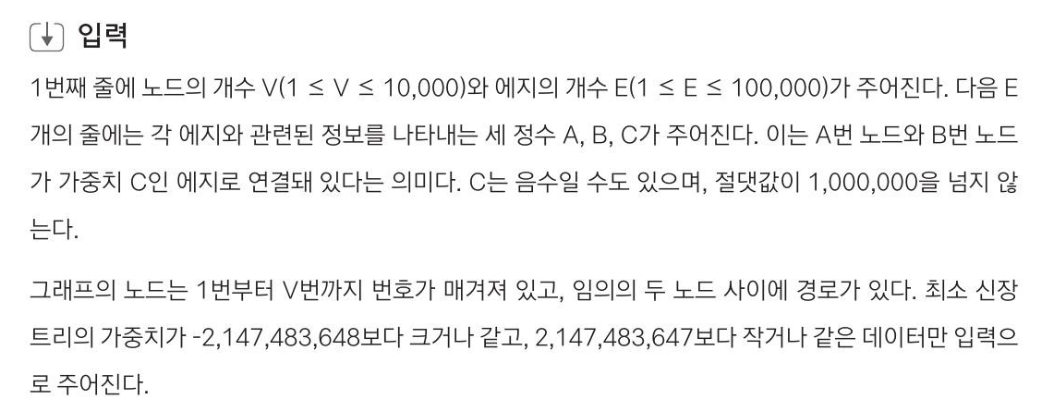

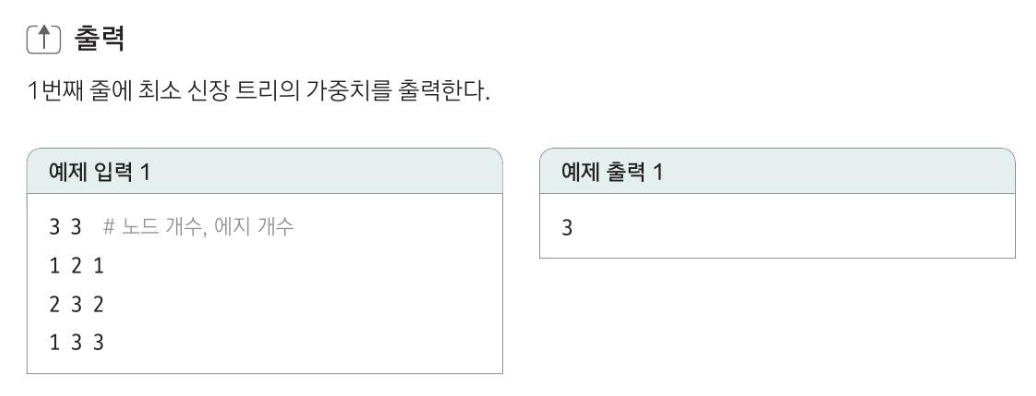

In [4]:
from queue import PriorityQueue  # 우선순위 큐 사용

v, e = map(int, input().split())
pq = PriorityQueue()  # 우선순위 큐 생성
parent =[0] * (v + 1)  # 부모 테이블 초기화

for i in range(1, v + 1):
    parent[i] = i  # 부모 테이블에서 자기 자신으로 초기화
    
for _ in range(e):
    s, e, c = map(int, input().split())
    pq.put((c, s, e))  # 비용 순으로 우선순위 큐에 삽입
    
def find(a):
    if a == parent[a]:
        return a
    parent[a] = find(parent[a])  # 부모 테이블 갱신=(경로 압축 기법)
    return parent[a]

def union(a, b):
    a = find(a)
    b = find(b)
    if a != b:
        parent[b] = a
        
edge = 0
result = 0

while edge < v - 1:
    c, s, e = pq.get()
    if find(s) != find(e): # 사이클이 발생하지 않는 경우(부모가 다른 경우)
        union(s, e)
        result += c
        edge += 1
        
print(result)

3
